<a href="https://colab.research.google.com/github/mashdas/Deep_Learning_101/blob/master/catsNdogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation,Dropout,MaxPool2D
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import itertools
import imageio

In [0]:

train_path="/content/train"
test_path="/content/test"
valid_path="/content/valid"

In [32]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=["cat","dog"],batch_size=10)
valid_batches=ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),classes=["cat","dog"],batch_size=6)
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=["cat","dog"],batch_size=8)

Found 79 images belonging to 2 classes.
Found 49 images belonging to 2 classes.
Found 41 images belonging to 2 classes.


In [0]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [0]:
img,labels=next(train_batches)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


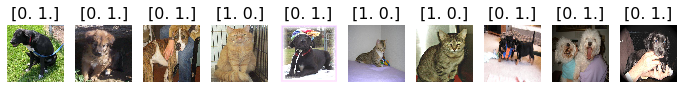

In [35]:
plots(img,titles=labels)

In [0]:
model=Sequential()
model.add(Conv2D(16,(3,3),activation="relu",input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(2,activation="softmax"))

In [43]:
model.compile(Adam(lr=.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
batch_normalization_13 (Batc (None, 222, 222, 16)      64        
_________________________________________________________________
dropout_13 (Dropout)         (None, 222, 222, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 220, 220, 32)      4640      
_________________________________________________________________
batch_normalization_14 (Batc (None, 220, 220, 32)      128       
_________________________________________________________________
dropout_14 (Dropout)         (None, 220, 220, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 218, 218, 64)     

In [44]:
model.fit_generator(train_batches,validation_data=valid_batches,epochs=20,verbose=2)

Epoch 1/20
 - 45s - loss: 1.9083 - accuracy: 0.4937 - val_loss: 0.2064 - val_accuracy: 0.5714
Epoch 2/20
 - 46s - loss: 1.0886 - accuracy: 0.6456 - val_loss: 0.7410 - val_accuracy: 0.5510
Epoch 3/20
 - 44s - loss: 0.7509 - accuracy: 0.6709 - val_loss: 1.1199 - val_accuracy: 0.5306
Epoch 4/20
 - 46s - loss: 0.4538 - accuracy: 0.7975 - val_loss: 1.2555 - val_accuracy: 0.5714
Epoch 5/20
 - 49s - loss: 0.6596 - accuracy: 0.7215 - val_loss: 0.4725 - val_accuracy: 0.5918
Epoch 6/20
 - 54s - loss: 0.4228 - accuracy: 0.7975 - val_loss: 0.5019 - val_accuracy: 0.5918
Epoch 7/20
 - 51s - loss: 0.3187 - accuracy: 0.9114 - val_loss: 0.4598 - val_accuracy: 0.5102
Epoch 8/20
 - 52s - loss: 0.5267 - accuracy: 0.8608 - val_loss: 2.4345 - val_accuracy: 0.5102
Epoch 9/20
 - 50s - loss: 0.4120 - accuracy: 0.8861 - val_loss: 0.1465 - val_accuracy: 0.4898
Epoch 10/20
 - 51s - loss: 0.5723 - accuracy: 0.8734 - val_loss: 2.1765 - val_accuracy: 0.5102
Epoch 11/20
 - 51s - loss: 0.2223 - accuracy: 0.9114 - val_

In [94]:
##model is over fitting.
##Now,fine tuning a vgg16 model

vgg16_model=keras.applications.vgg16.VGG16()
# vgg16_model.summary()
type(vgg16_model)

keras.engine.training.Model

In [0]:
Model=Sequential()
for x in vgg16_model.layers[:-1]:
  Model.add(x)

In [96]:
Model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [0]:
for x in Model.layers:
  x.trainable=False


In [98]:
Model.add(Dense(2,activation="softmax"))
Model.summary()


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [103]:
Model.compile(Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
Model.fit_generator(train_batches,validation_data=valid_batches,epochs=5,verbose=2)

Epoch 1/5
 - 66s - loss: 0.0247 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 0.8980
Epoch 2/5
 - 65s - loss: 0.0151 - accuracy: 1.0000 - val_loss: 5.2412 - val_accuracy: 0.8980
Epoch 3/5
 - 68s - loss: 0.0103 - accuracy: 1.0000 - val_loss: 2.7379e-04 - val_accuracy: 0.8980
Epoch 4/5
 - 65s - loss: 0.0076 - accuracy: 1.0000 - val_loss: 1.3923e-04 - val_accuracy: 0.8980
Epoch 5/5
 - 65s - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.6211e-04 - val_accuracy: 0.8980


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


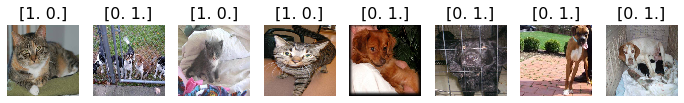

In [104]:
#Predicting Stuff

test_imgs,test_labels=next(test_batches)
plots(test_imgs,titles=test_labels)

In [0]:
# test_lables=test_labels[:0]
# predictions=Model.predict_generator(test_batches,verbose=0)
# cm=confusion_matrix(test_labels,np.round(predictions[:0]))
# cm_labels=["cat","dog"]
# plot_confusion_matrix(cm,cm_labels,title="Confusion Matrix")

In [0]:
##Augmenting Data
gen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.15,zoom_range=0.1,channel_shift_range=10,horizontal_flip=True)

In [0]:
img_path="/content/train/dog/dog.1389.jpg"
image=np.expand_dims(imageio.imread(img_path),0)

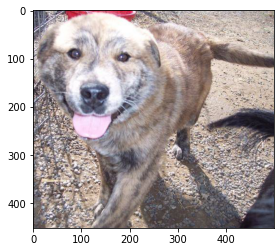

In [123]:
plt.imshow(image[0])

In [0]:
aug_iter=gen.flow(image)


In [0]:
aug_images=[next(aug_iter)[0].astype(np.uint8) for _ in range(10) ]

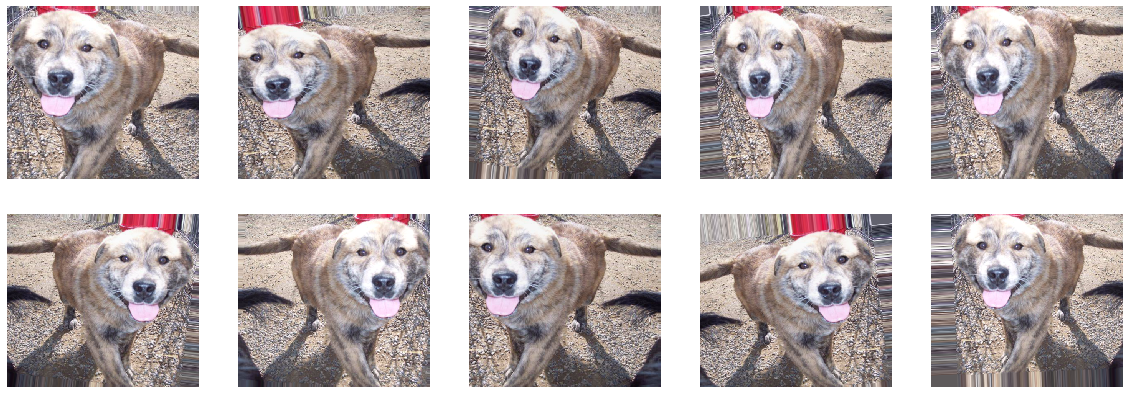

In [120]:
plots(aug_images,figsize=(20,7),rows=2)

In [121]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

In [133]:
# serialize model to JSON
model_json = Model.to_json()
with open("Model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
Model.save_weights("Model.h5")
print("Saved model to disk")



Saved model to disk
